In [5]:
import pandas as pd
import deepchem as dc

from notebook.spectra_tanimoto_splits import transformers

from model.chemprop.examples.transfer_learning import target_columns

No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
No normalization for NumAmideBonds. Feature removed!
No normalization for NumAtomStereoCenters. Feature removed!
No normalization for NumBridgeheadAtoms. Feature removed!
No normalization for NumHeterocycles. Feature removed!
No normalization for NumSpiroAtoms. Feature removed!
No normalization for NumUnspecifiedAtomStereoCenters. Feature removed!
No normalization for Phi. Feature removed!
Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/deepchem/models/torch_models/__init__.py)
Skipped loading modules with p

In [4]:
df_bace = pd.read_csv('/Users/ivymac/Desktop/SAGE_Lab/dataset/bace.csv')
df_bace

,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,5,...,53.205711,78.640335,226.855410,107.434910,37.133846,0.000000,7.980170,0.000000,0.000000,1
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,1,Train,8.853872,657.81073,2.6412,5,4,16,...,73.817162,47.171600,365.676940,174.076750,34.923889,7.980170,24.148668,0.000000,24.663788,2
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,1,Train,8.698970,591.74091,2.5499,4,3,11,...,70.365707,47.941147,192.406520,255.752550,23.654478,0.230159,15.879790,0.000000,24.663788,3
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,BACE_4,1,Train,8.698970,591.67828,3.1680,4,3,12,...,56.657166,37.954151,194.353040,202.763350,36.498634,0.980913,8.188327,0.000000,26.385181,4
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_5,1,Train,8.698970,629.71283,3.5086,3,3,11,...,78.945702,39.361153,179.712880,220.461300,23.654478,0.230159,15.879790,0.000000,26.100143,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,Clc1cc2nc(n(c2cc1)C(CC(=O)NCC1CCOCC1)CC)N,BACE_1543,0,Test,3.000000,364.86969,2.5942,3,2,6,...,37.212799,37.681076,180.226410,95.670128,30.107586,9.368159,7.980170,0.000000,0.000000,1543
1509,Clc1cc2nc(n(c2cc1)C(CC(=O)NCc1ncccc1)CC)N,BACE_1544,0,Test,3.000000,357.83731,2.8229,3,2,6,...,45.792797,47.349350,122.401500,99.877144,30.107586,9.368159,7.980170,0.000000,0.000000,1544
1510,Brc1cc(ccc1)C1CC1C=1N=C(N)N(C)C(=O)C=1,BACE_1545,0,Test,2.953115,320.18451,3.0895,2,1,2,...,47.790600,22.563574,96.290794,58.798935,20.071724,9.368159,0.000000,6.904104,0.000000,1545
1511,O=C1N(C)C(=NC(=C1)C1CC1c1cc(ccc1)-c1ccccc1)N,BACE_1546,0,Test,2.733298,317.38440,3.8595,2,1,3,...,77.219978,9.316234,95.907784,112.609720,20.071724,9.368159,0.000000,6.904104,0.000000,1546


In [11]:
tasks, bace_dataset, transformers = dc.molnet.load_bace_classification(splitter = None, reload = False)

[20:57:07] DEPRECATION WARNING: please use MorganGenerator
[20:57:07] DEPRECATION WARNING: please use MorganGenerator
[20:57:07] DEPRECATION WARNING: please use MorganGenerator
[20:57:07] DEPRECATION WARNING: please use MorganGenerator
[20:57:07] DEPRECATION WARNING: please use MorganGenerator
[20:57:07] DEPRECATION WARNING: please use MorganGenerator
[20:57:07] DEPRECATION WARNING: please use MorganGenerator
[20:57:07] DEPRECATION WARNING: please use MorganGenerator
[20:57:07] DEPRECATION WARNING: please use MorganGenerator
[20:57:07] DEPRECATION WARNING: please use MorganGenerator
[20:57:07] DEPRECATION WARNING: please use MorganGenerator
[20:57:07] DEPRECATION WARNING: please use MorganGenerator
[20:57:07] DEPRECATION WARNING: please use MorganGenerator
[20:57:07] DEPRECATION WARNING: please use MorganGenerator
[20:57:07] DEPRECATION WARNING: please use MorganGenerator
[20:57:07] DEPRECATION WARNING: please use MorganGenerator
[20:57:07] DEPRECATION WARNING: please use MorganGenerat

In [10]:
pd.DataFrame(bace_dataset[0].ids)

,0
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...
...,...
1508,Clc1cc2nc(n(c2cc1)C(CC(=O)NCC1CCOCC1)CC)N
1509,Clc1cc2nc(n(c2cc1)C(CC(=O)NCc1ncccc1)CC)N
1510,Brc1cc(ccc1)C1CC1C=1N=C(N)N(C)C(=O)C=1
1511,O=C1N(C)C(=NC(=C1)C1CC1c1cc(ccc1)-c1ccccc1)N


In [13]:
tasks, bbbp_dataset, transformers = dc.molnet.load_bbbp(splitter = None, reload = False)

[21:01:12] DEPRECATION WARNING: please use MorganGenerator
[21:01:12] DEPRECATION WARNING: please use MorganGenerator
[21:01:12] DEPRECATION WARNING: please use MorganGenerator
[21:01:12] DEPRECATION WARNING: please use MorganGenerator
[21:01:12] DEPRECATION WARNING: please use MorganGenerator
[21:01:12] DEPRECATION WARNING: please use MorganGenerator
[21:01:12] DEPRECATION WARNING: please use MorganGenerator
[21:01:12] DEPRECATION WARNING: please use MorganGenerator
[21:01:12] DEPRECATION WARNING: please use MorganGenerator
[21:01:12] DEPRECATION WARNING: please use MorganGenerator
[21:01:12] DEPRECATION WARNING: please use MorganGenerator
[21:01:12] DEPRECATION WARNING: please use MorganGenerator
[21:01:12] DEPRECATION WARNING: please use MorganGenerator
[21:01:12] DEPRECATION WARNING: please use MorganGenerator
[21:01:12] DEPRECATION WARNING: please use MorganGenerator
[21:01:12] DEPRECATION WARNING: please use MorganGenerator
[21:01:12] DEPRECATION WARNING: please use MorganGenerat

In [15]:
pd.DataFrame(bbbp_dataset[0].ids)

,0
0,[Cl].CC(C)NCC(O)COc1cccc2ccccc12
1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl
2,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...
3,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C
4,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...
...,...
2034,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl
2035,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...
2036,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...
2037,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...


In [17]:
df_bbbp = pd.read_csv('/Users/ivymac/Desktop/SAGE_Lab/dataset/bbbp.csv')
df_bbbp

,num,name,p_np,smiles
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...
...,...,...,...,...
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...


In [18]:
tasks, delaney_dataset, transformers = dc.molnet.load_delaney(splitter = None, reload = False)

[21:24:40] DEPRECATION WARNING: please use MorganGenerator
[21:24:40] DEPRECATION WARNING: please use MorganGenerator
[21:24:40] DEPRECATION WARNING: please use MorganGenerator
[21:24:40] DEPRECATION WARNING: please use MorganGenerator
[21:24:40] DEPRECATION WARNING: please use MorganGenerator
[21:24:40] DEPRECATION WARNING: please use MorganGenerator
[21:24:40] DEPRECATION WARNING: please use MorganGenerator
[21:24:40] DEPRECATION WARNING: please use MorganGenerator
[21:24:40] DEPRECATION WARNING: please use MorganGenerator
[21:24:40] DEPRECATION WARNING: please use MorganGenerator
[21:24:40] DEPRECATION WARNING: please use MorganGenerator
[21:24:40] DEPRECATION WARNING: please use MorganGenerator
[21:24:40] DEPRECATION WARNING: please use MorganGenerator
[21:24:40] DEPRECATION WARNING: please use MorganGenerator
[21:24:40] DEPRECATION WARNING: please use MorganGenerator
[21:24:40] DEPRECATION WARNING: please use MorganGenerator
[21:24:40] DEPRECATION WARNING: please use MorganGenerat

In [21]:
delaney_dataset[0].ids

array(['OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O ',
       'Cc1occc1C(=O)Nc2ccccc2', 'CC(C)=CCCC(C)=CC(=O)', ...,
       'CCSCCSP(=S)(OC)OC', 'CCC(C)C',
       'COP(=O)(OC)OC(=CCl)c1cc(Cl)c(Cl)cc1Cl'], dtype=object)

In [85]:
import numpy as np
import pandas as pd
import deepchem as dc

def dataset_check(name):
    print(f'Assessing {name}')
    df = pd.read_csv(f'/Users/ivymac/Desktop/SAGE_Lab/dataset/{name}.csv')
    smiles = np.array(df['smiles'])

    tasks, molnet_dataset, transformers = getattr(dc.molnet, f'load_{name}')(splitter=None,reload=False)
    dataset_smiles = np.array(molnet_dataset[0].ids)

    if len(smiles) != len(dataset_smiles):
        print('Different dataset size')
        print(len(smiles))
        print(len(dataset_smiles))
        assert(False)

    print(len(smiles))
    print(len(dataset_smiles))

    print(smiles[0])
    print(dataset_smiles[0])

    for i in range(1, min(len(smiles), len(dataset_smiles))):
        if smiles[i] != dataset_smiles[i]:
            print(f'Problem at {name} in molecule {i}')
            assert(False)


datasets = ['delaney']
for name in datasets:
    dataset_check(name)

Assessing delaney


[21:36:40] DEPRECATION WARNING: please use MorganGenerator
[21:36:40] DEPRECATION WARNING: please use MorganGenerator
[21:36:40] DEPRECATION WARNING: please use MorganGenerator
[21:36:40] DEPRECATION WARNING: please use MorganGenerator
[21:36:40] DEPRECATION WARNING: please use MorganGenerator
[21:36:40] DEPRECATION WARNING: please use MorganGenerator
[21:36:40] DEPRECATION WARNING: please use MorganGenerator
[21:36:40] DEPRECATION WARNING: please use MorganGenerator
[21:36:40] DEPRECATION WARNING: please use MorganGenerator
[21:36:40] DEPRECATION WARNING: please use MorganGenerator
[21:36:40] DEPRECATION WARNING: please use MorganGenerator
[21:36:40] DEPRECATION WARNING: please use MorganGenerator
[21:36:40] DEPRECATION WARNING: please use MorganGenerator
[21:36:40] DEPRECATION WARNING: please use MorganGenerator
[21:36:40] DEPRECATION WARNING: please use MorganGenerator
[21:36:40] DEPRECATION WARNING: please use MorganGenerator
[21:36:40] DEPRECATION WARNING: please use MorganGenerat

1128
1128
OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O
OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O 
Problem at delaney in molecule 5


AssertionError: 

In [81]:
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator

dataset = pd.read_csv(f'/Users/ivymac/Desktop/SAGE_Lab/dataset/hiv.csv')
dataset_smiles = dataset['smiles']

print(len(dataset_smiles))
mfp = []
for i in range(len(dataset_smiles)):
    mol = Chem.MolFromSmiles(dataset_smiles[i])
    print(f"At {i}")
    fp = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=1024).GetFingerprint(mol)
    mfp.append(fp)

41120
At 0
At 1
At 2
At 3
At 4
At 5
At 6
At 7
At 8
At 9
At 10
At 11
At 12
At 13
At 14
At 15
At 16
At 17
At 18
At 19
At 20
At 21
At 22
At 23
At 24
At 25
At 26
At 27
At 28
At 29
At 30
At 31
At 32
At 33
At 34
At 35
At 36
At 37
At 38
At 39
At 40
At 41
At 42
At 43
At 44
At 45
At 46
At 47
At 48
At 49
At 50
At 51
At 52
At 53
At 54
At 55
At 56
At 57
At 58
At 59
At 60
At 61
At 62
At 63
At 64
At 65
At 66
At 67
At 68
At 69
At 70
At 71
At 72
At 73
At 74
At 75
At 76
At 77
At 78
At 79
At 80
At 81
At 82
At 83
At 84
At 85
At 86
At 87
At 88
At 89
At 90
At 91
At 92
At 93
At 94
At 95
At 96
At 97
At 98
At 99
At 100
At 101
At 102
At 103
At 104
At 105
At 106
At 107
At 108
At 109
At 110
At 111
At 112
At 113
At 114
At 115
At 116
At 117
At 118
At 119
At 120
At 121
At 122
At 123
At 124
At 125
At 126
At 127
At 128
At 129
At 130
At 131
At 132
At 133
At 134
At 135
At 136
At 137
At 138
At 139
At 140
At 141
At 142
At 143
At 144
At 145
At 146
At 147
At 148
At 149
At 150
At 151
At 152
At 153
At 154
At 155
At 156
At 15

[21:33:28] WARNING: not removing hydrogen atom without neighbors
[21:33:28] WARNING: not removing hydrogen atom without neighbors


At 36720
At 36721
At 36722
At 36723
At 36724
At 36725
At 36726
At 36727
At 36728
At 36729
At 36730
At 36731
At 36732
At 36733
At 36734
At 36735
At 36736
At 36737
At 36738
At 36739
At 36740
At 36741
At 36742
At 36743
At 36744
At 36745
At 36746
At 36747
At 36748
At 36749
At 36750
At 36751
At 36752
At 36753
At 36754
At 36755
At 36756
At 36757
At 36758
At 36759
At 36760
At 36761
At 36762
At 36763
At 36764
At 36765
At 36766
At 36767
At 36768
At 36769
At 36770
At 36771
At 36772
At 36773
At 36774
At 36775
At 36776
At 36777
At 36778
At 36779
At 36780
At 36781
At 36782
At 36783
At 36784
At 36785
At 36786
At 36787
At 36788
At 36789
At 36790
At 36791
At 36792
At 36793
At 36794
At 36795
At 36796
At 36797
At 36798
At 36799
At 36800
At 36801
At 36802
At 36803
At 36804
At 36805
At 36806
At 36807
At 36808
At 36809
At 36810
At 36811
At 36812
At 36813
At 36814
At 36815
At 36816
At 36817
At 36818
At 36819
At 36820
At 36821
At 36822
At 36823
At 36824
At 36825
At 36826
At 36827
At 36828
At 36829
At 36830
A

In [73]:
import deepchem as dc
from chemprop import featurizers, data, nn, models
import pandas as pd
import numpy as np
import pickle
from lightning import pytorch as pl
from os.path import join
from pathlib import Path

df_clintox = pd.read_csv('/Users/ivymac/Desktop/SAGE_Lab/dataset/clintox.csv')

T = 2
mp = nn.BondMessagePassing()
agg = nn.MeanAggregation()
batch_norm = False
ffn = nn.BinaryClassificationFFN(n_tasks = T)
metric_list = [nn.metrics.BinaryAUROC(num_tasks = T), nn.metrics.BinaryF1Score(num_tasks = T), nn.metrics.BinaryAccuracy(num_tasks = T)]
trainer = pl.Trainer(
        logger=False,
        enable_checkpointing=True,
        enable_progress_bar=True,
        accelerator="auto",
        max_epochs=20)

smiles = df_clintox['smiles']
smis = df_clintox.loc[:, 'smiles'].values
ys = df_clintox.drop(columns = 'smiles').values

all_data = [data.MoleculeDatapoint.from_smi(smi, y) for smi, y in zip(smiles, ys)]
featurizer = featurizers.SimpleMoleculeMolGraphFeaturizer()

with open('/Users/ivymac/Desktop/SAGE_Lab/splits/spectra_hamming/clintox/clintox_SPECTRA_splits/SP_0.00_0/train.pkl', 'rb') as f:
    train_indices = pickle.load(f)
    print(len(train_indices))

with open('/Users/ivymac/Desktop/SAGE_Lab/splits/spectra_hamming/clintox/clintox_SPECTRA_splits/SP_0.00_0/test.pkl', 'rb') as f:
    test_indices = pickle.load(f)
    print(len(test_indices))

train_dset = data.MoleculeDataset([all_data[j] for j in train_indices], featurizer = featurizer)
test_dset = data.MoleculeDataset([all_data[j] for j in test_indices], featurizer = featurizer)

y_train = np.array([train_dset[j].y for j in range(len(train_dset))])
y_test = np.array([test_dset[j].y for j in range(len(test_dset))])
if ffn == nn.BinaryClassificationFFN():
    assert np.any(y_train == 0) and np.any(y_train == 1)
    assert np.any(y_test == 0) and np.any(y_test == 1)

train_loader = data.build_dataloader(train_dset)
test_loader = data.build_dataloader(test_dset)

mpnn = models.MPNN(mp,agg,ffn,batch_norm, metric_list)
trainer.fit(mpnn, train_loader)
results = trainer.test(mpnn, test_loader)
results

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


1182
296


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/lightning/pytorch/trainer/configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
Loading `train_dataloader` to estimate number of stepping batches.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

  | Name            | Type                    | Params | Mode 
--------------------------------------------------------------------
0 | message_passing | BondMessagePassing      | 227 K  | train
1 | agg             | MeanAggregation         | 0      | train
2 | bn              | Identity                | 0      | train
3 | predictor       | BinaryClassificationFFN | 90.9

Epoch 19: 100%|██████████| 19/19 [00:03<00:00,  5.17it/s, train_loss_step=0.222, train_loss_epoch=0.169] 

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 19/19 [00:03<00:00,  5.11it/s, train_loss_step=0.222, train_loss_epoch=0.169]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:476: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 5/5 [00:06<00:00,  0.74it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test/accuracy       │    0.9087837934494019     │
│          test/f1          │    0.9093959927558899     │
│         test/roc          │    0.9694749116897583     │
└───────────────────────────┴───────────────────────────┘

[{'test/roc': 0.9694749116897583,
  'test/f1': 0.9093959927558899,
  'test/accuracy': 0.9087837934494019}]

In [97]:
import pandas as pd


df = pd.read_csv('/Users/ivymac/Desktop/SAGE_Lab/dataset/delaney.csv')
# rows where 'smiles' value appears more than once
dup_mask = df['smiles'].duplicated(keep=False)
dups = df[dup_mask].sort_values('smiles')

print("Duplicate SMILES count:", df['smiles'].duplicated().sum())
print(dups)

# counts per SMILES
counts = df['smiles'].value_counts()
print(counts[counts > 1])


Duplicate SMILES count: 0
Empty DataFrame
Columns: [smiles, logSolubility]
Index: []
Series([], Name: count, dtype: int64)


In [100]:
with open('/Users/ivymac/Desktop/SAGE_Lab/splits/spectra_tanimoto/bace_SPECTRA_splits/SP_0.10_0/stats.pkl', 'rb') as f:
    stats = pickle.load(f)

type(stats)

dict

In [101]:
results[0]

[{'test/roc': 0.9694749116897583,
  'test/f1': 0.9093959927558899,
  'test/accuracy': 0.9087837934494019}]

In [107]:
new = {**stats, **results[0]}
new
df = pd.DataFrame(new, index = ['hi'])
df

,SPECTRA_parameter,train_size,test_size,cross_split_overlap,test/roc,test/f1,test/accuracy
hi,0.1,344,86,0.152882,0.969475,0.909396,0.908784


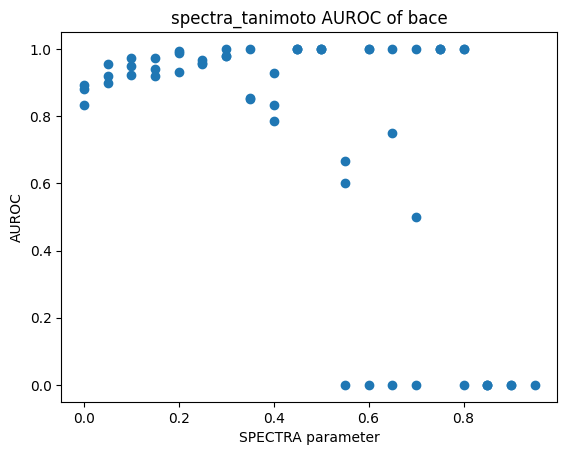

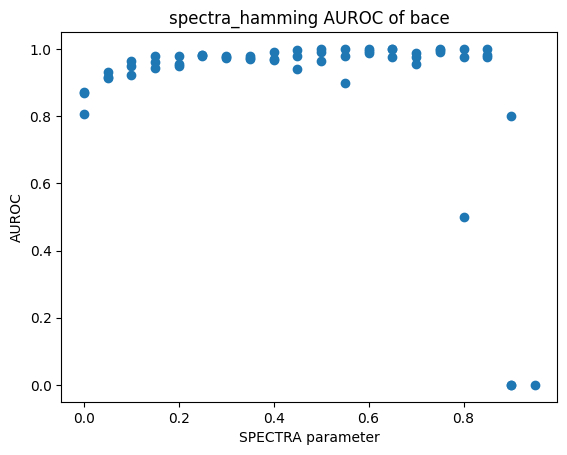

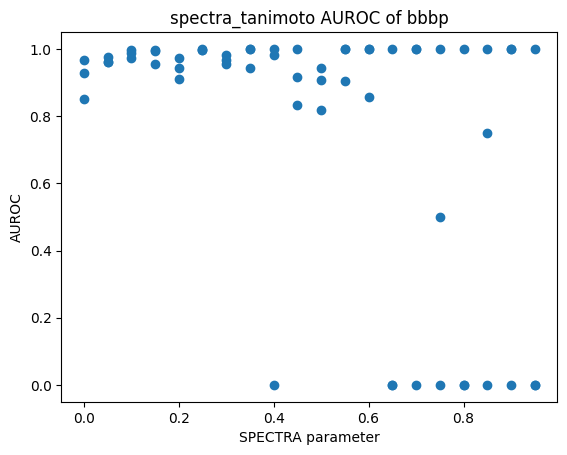

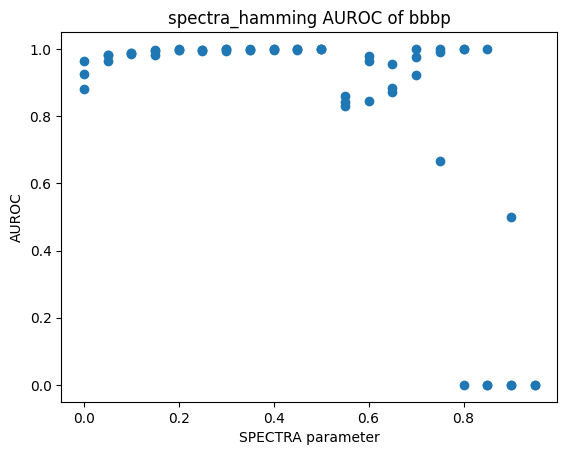

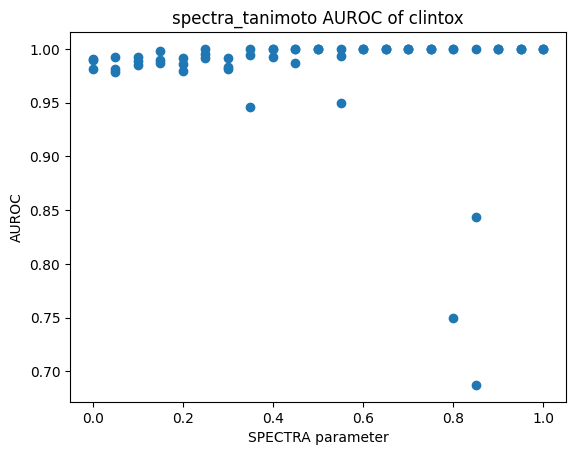

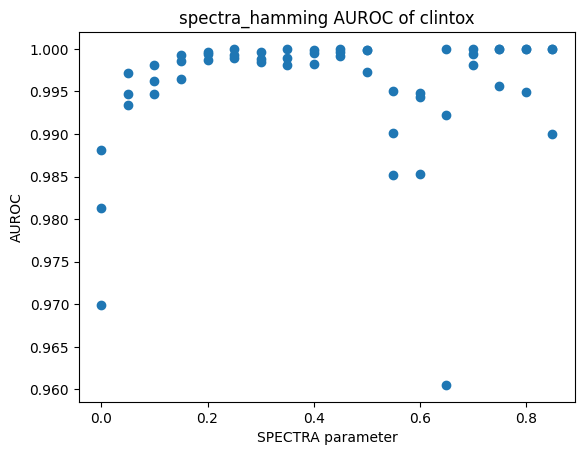

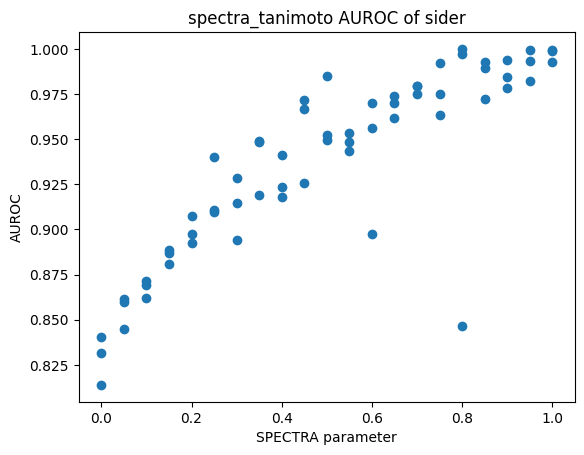

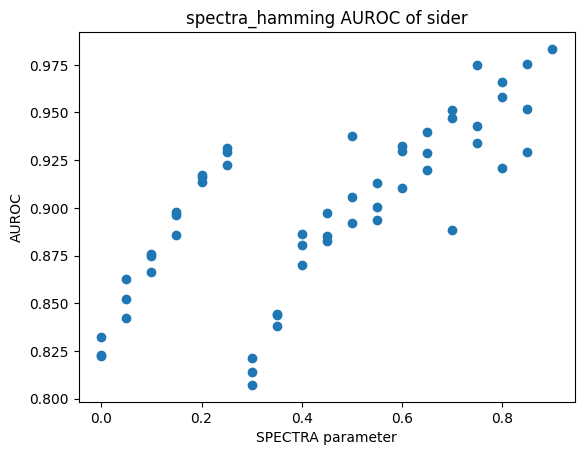

In [114]:
import matplotlib.pyplot as plt
import os

def plot_auroc(spectra_name, dataset_name):
    df = pd.read_csv(f'/Users/ivymac/Desktop/SAGE_Lab/metrics/chemprop/{spectra_name}/{dataset_name}_{spectra_name}_metrics.csv')
    os.makedirs(f'/Users/ivymac/Desktop/SAGE_Lab/metrics/chemprop/plots/{spectra_name}', exist_ok = True)
    file_path = os.path.join(f'/Users/ivymac/Desktop/SAGE_Lab/metrics/chemprop/plots/{spectra_name}', dataset_name)
    plt.scatter(df['SPECTRA_parameter'], df['test/roc'])
    plt.xlabel('SPECTRA parameter')
    plt.ylabel('AUROC')
    plt.title(f'{spectra_name} AUROC of {dataset_name}')
    plt.savefig(file_path)
    plt.show()
    plt.close()

dataset_names = ['bace','bbbp','clintox','sider']
for dataset_name in dataset_names:
    for spectra_name in ['spectra_tanimoto','spectra_hamming']:
        plot_auroc(spectra_name, dataset_name)

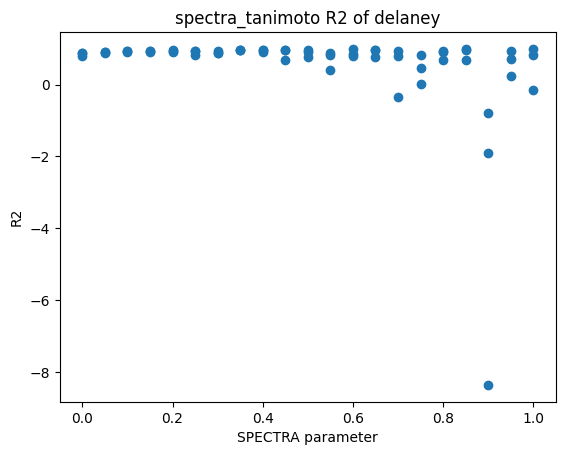

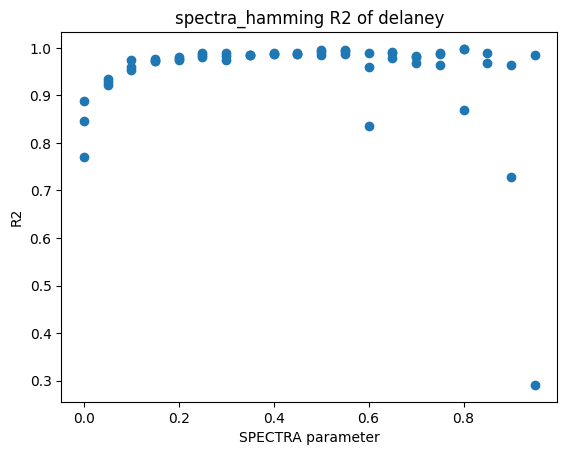

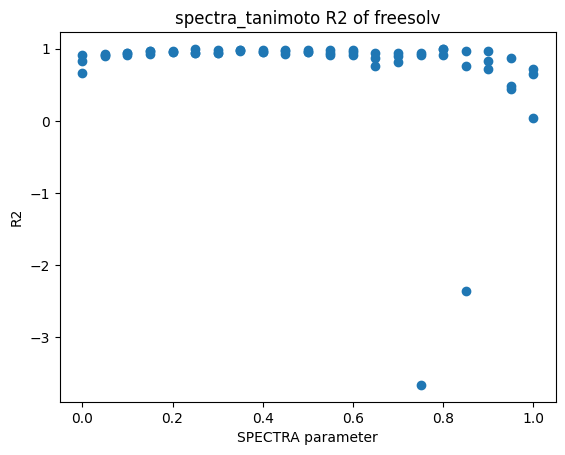

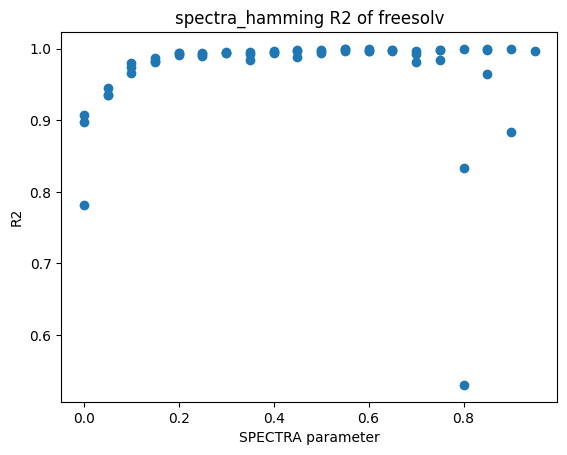

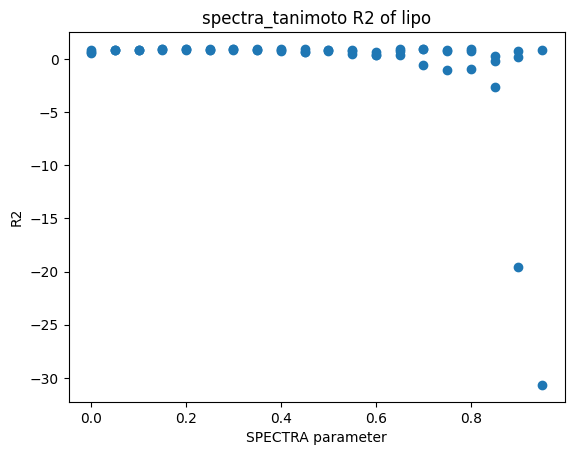

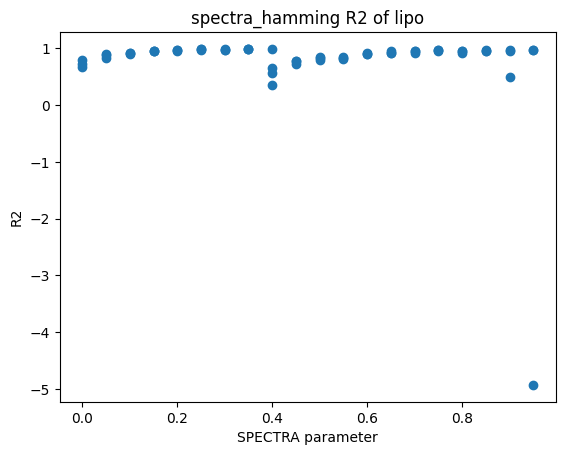

In [117]:
import matplotlib.pyplot as plt
import os

def plot_r2(spectra_name, dataset_name):
    df = pd.read_csv(f'/Users/ivymac/Desktop/SAGE_Lab/metrics/chemprop/{spectra_name}/{dataset_name}_{spectra_name}_metrics.csv')
    os.makedirs(f'/Users/ivymac/Desktop/SAGE_Lab/metrics/chemprop/plots/{spectra_name}', exist_ok = True)
    file_path = os.path.join(f'/Users/ivymac/Desktop/SAGE_Lab/metrics/chemprop/plots/{spectra_name}', dataset_name)
    plt.scatter(df['SPECTRA_parameter'], df['test/r2'])
    plt.xlabel('SPECTRA parameter')
    plt.ylabel('R2')
    plt.title(f'{spectra_name} R2 of {dataset_name}')
    plt.savefig(file_path)
    plt.show()
    plt.close()

dataset_names = ['delaney','freesolv','lipo']
for dataset_name in dataset_names:
    for spectra_name in ['spectra_tanimoto','spectra_hamming']:
        plot_r2(spectra_name, dataset_name)

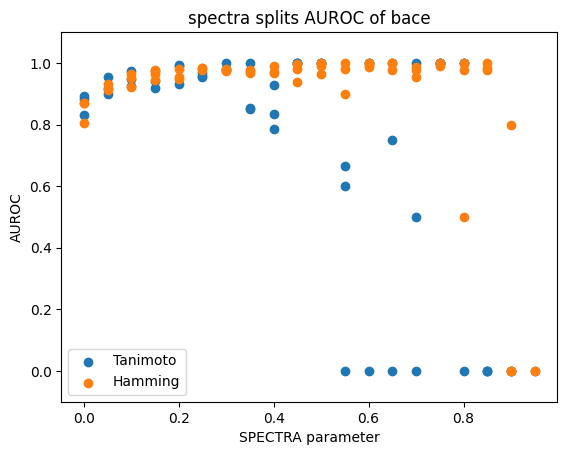

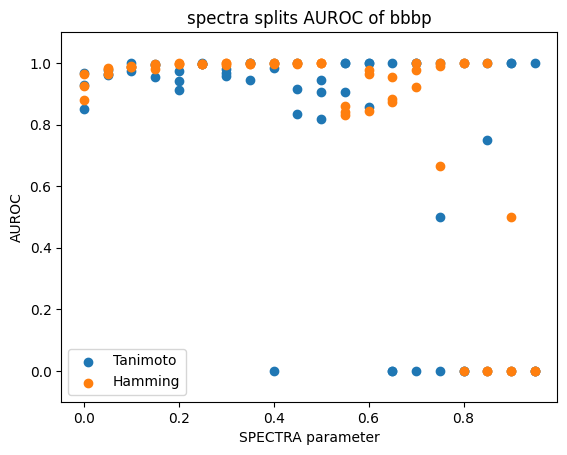

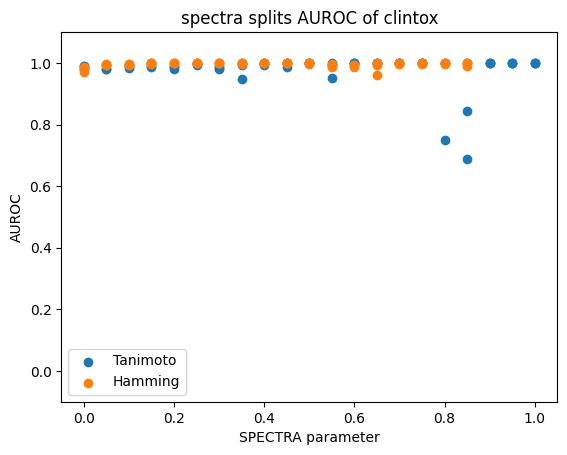

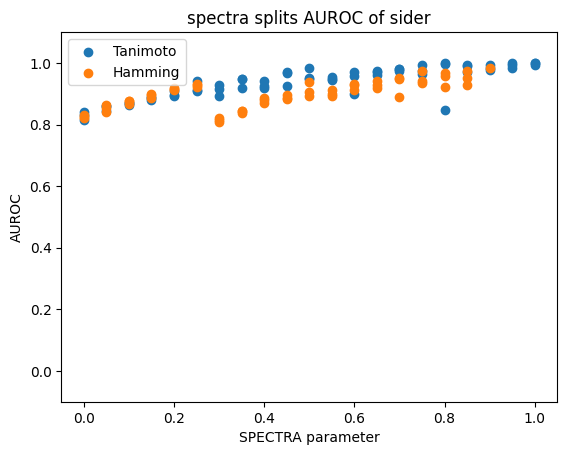

In [135]:
import matplotlib.pyplot as plt
import os

def plot_auroc(dataset_name):
    tanimoto_df = pd.read_csv(f'/Users/ivymac/Desktop/SAGE_Lab/metrics/chemprop/spectra_tanimoto/{dataset_name}_spectra_tanimoto_metrics.csv')
    hamming_df = pd.read_csv(f'/Users/ivymac/Desktop/SAGE_Lab/metrics/chemprop/spectra_hamming/{dataset_name}_spectra_hamming_metrics.csv')
    os.makedirs(f'/Users/ivymac/Desktop/SAGE_Lab/metrics/chemprop/plots/spectra_comparison', exist_ok = True)
    file_path = os.path.join(f'/Users/ivymac/Desktop/SAGE_Lab/metrics/chemprop/plots/spectra_comparison', dataset_name)
    plt.scatter(tanimoto_df['SPECTRA_parameter'], tanimoto_df['test/roc'])
    plt.scatter(hamming_df['SPECTRA_parameter'], hamming_df['test/roc'])
    plt.xlabel('SPECTRA parameter')
    plt.ylabel('AUROC')
    plt.ylim(-0.1,1.1)
    plt.legend(['Tanimoto','Hamming'])
    plt.title(f'spectra splits AUROC of {dataset_name}')
    plt.savefig(file_path, dpi = 400)
    plt.show()


dataset_names = ['bace','bbbp','clintox','sider']
for dataset_name in dataset_names:
        plot_auroc(dataset_name)

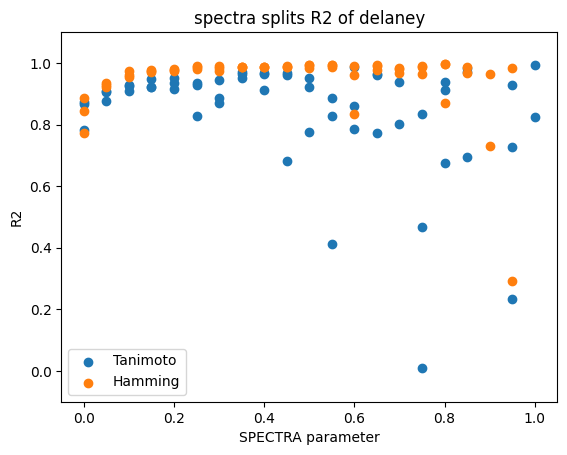

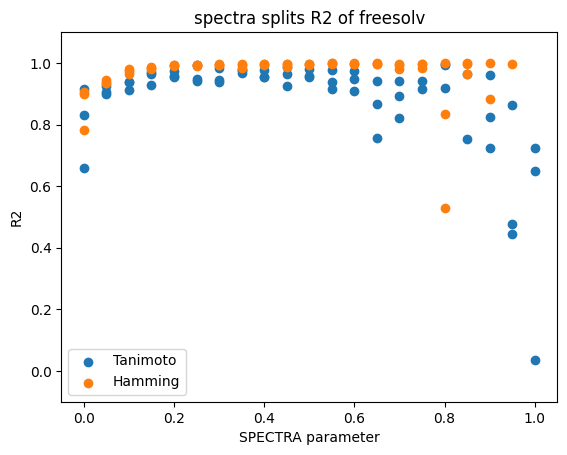

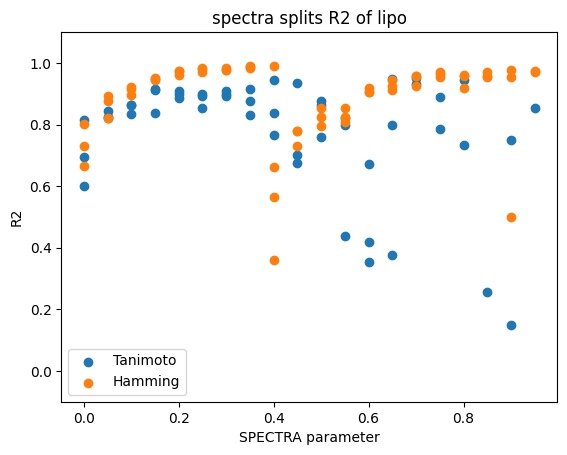

In [136]:
import matplotlib.pyplot as plt
import os

def plot_r2(dataset_name):
    tanimoto_df = pd.read_csv(f'/Users/ivymac/Desktop/SAGE_Lab/metrics/chemprop/spectra_tanimoto/{dataset_name}_spectra_tanimoto_metrics.csv')
    hamming_df = pd.read_csv(f'/Users/ivymac/Desktop/SAGE_Lab/metrics/chemprop/spectra_hamming/{dataset_name}_spectra_hamming_metrics.csv')
    os.makedirs(f'/Users/ivymac/Desktop/SAGE_Lab/metrics/chemprop/plots/spectra_comparison', exist_ok = True)
    file_path = os.path.join(f'/Users/ivymac/Desktop/SAGE_Lab/metrics/chemprop/plots/spectra_comparison', dataset_name)
    plt.scatter(tanimoto_df['SPECTRA_parameter'], tanimoto_df['test/r2'])
    plt.scatter(hamming_df['SPECTRA_parameter'], hamming_df['test/r2'])
    plt.xlabel('SPECTRA parameter')
    plt.ylabel('R2')
    plt.ylim(-0.1,1.1)
    plt.legend(['Tanimoto','Hamming'])
    plt.title(f'spectra splits R2 of {dataset_name}')
    plt.savefig(file_path, dpi = 400)
    plt.show()
    plt.close()

dataset_names = ['delaney','freesolv','lipo']
for dataset_name in dataset_names:
        plot_r2(dataset_name)

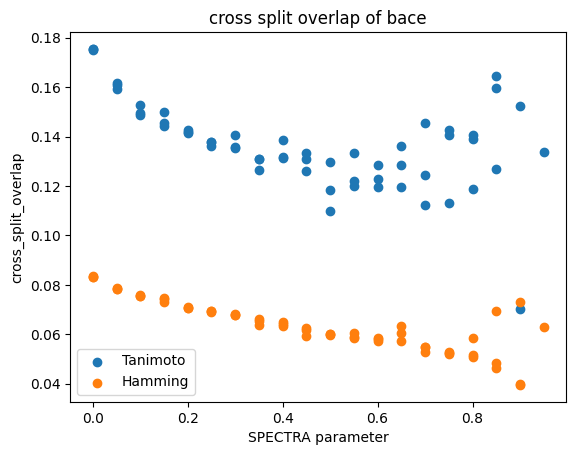

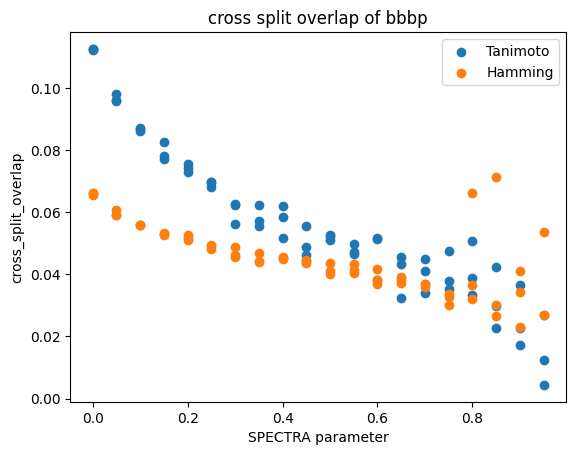

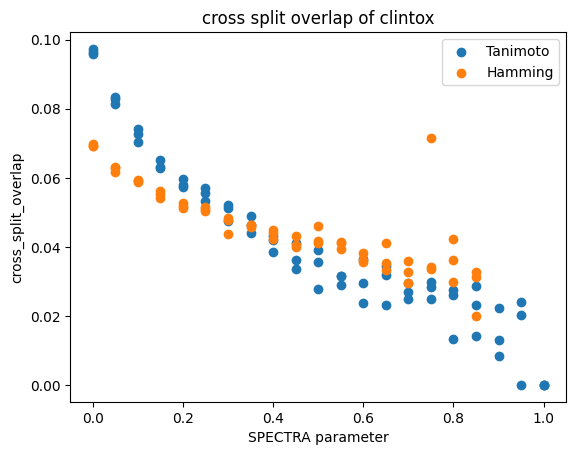

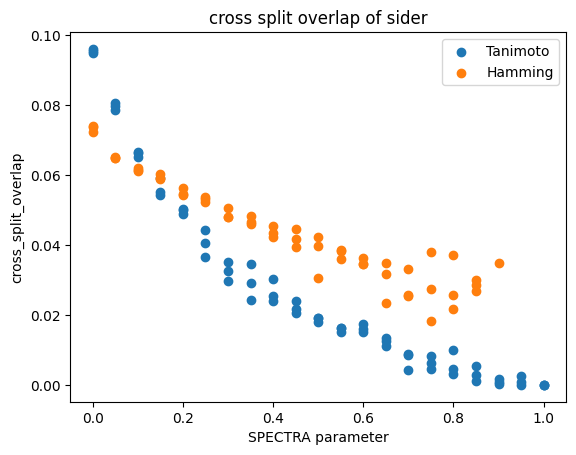

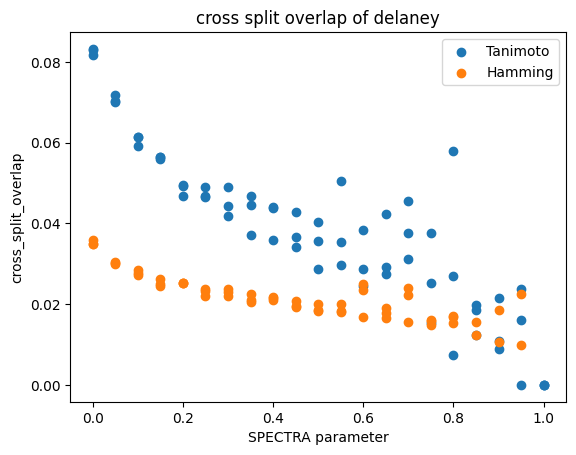

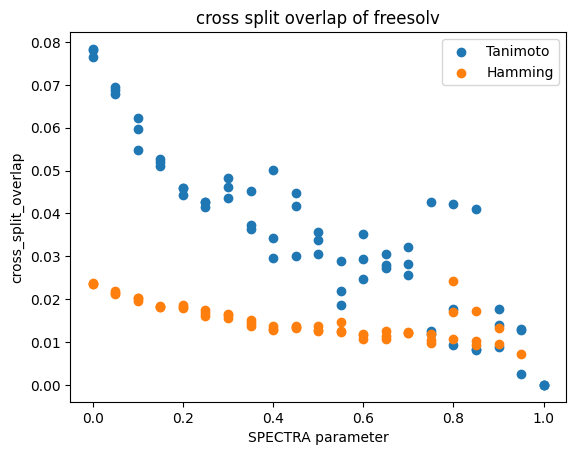

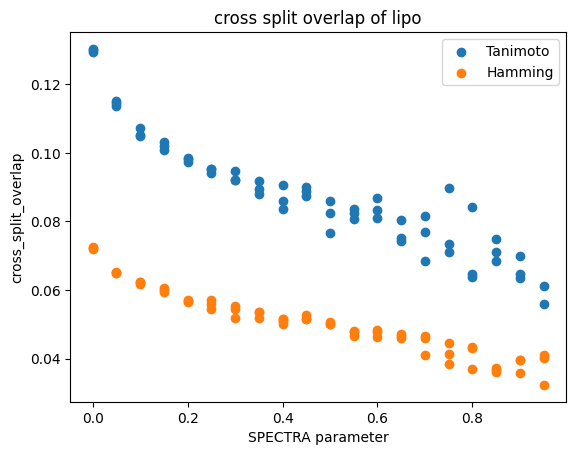

In [138]:
import matplotlib.pyplot as plt
import os

def plot_cross_split_overlap(dataset_name):
    tanimoto_df = pd.read_csv(f'/Users/ivymac/Desktop/SAGE_Lab/metrics/chemprop/spectra_tanimoto/{dataset_name}_spectra_tanimoto_metrics.csv')
    hamming_df = pd.read_csv(f'/Users/ivymac/Desktop/SAGE_Lab/metrics/chemprop/spectra_hamming/{dataset_name}_spectra_hamming_metrics.csv')
    os.makedirs(f'/Users/ivymac/Desktop/SAGE_Lab/metrics/chemprop/plots/cross_split_overlap', exist_ok = True)
    file_path = os.path.join(f'/Users/ivymac/Desktop/SAGE_Lab/metrics/chemprop/plots/cross_split_overlap', dataset_name)
    plt.scatter(tanimoto_df['SPECTRA_parameter'], tanimoto_df['cross_split_overlap'])
    plt.scatter(hamming_df['SPECTRA_parameter'], hamming_df['cross_split_overlap'])
    plt.xlabel('SPECTRA parameter')
    plt.ylabel('cross_split_overlap')
    plt.legend(['Tanimoto','Hamming'])
    plt.title(f'cross split overlap of {dataset_name} ')
    plt.savefig(file_path, dpi = 400)
    plt.show()
    plt.close()

dataset_names = ['bace','bbbp','clintox','sider','delaney','freesolv','lipo']
for dataset_name in dataset_names:
        plot_cross_split_overlap(dataset_name)

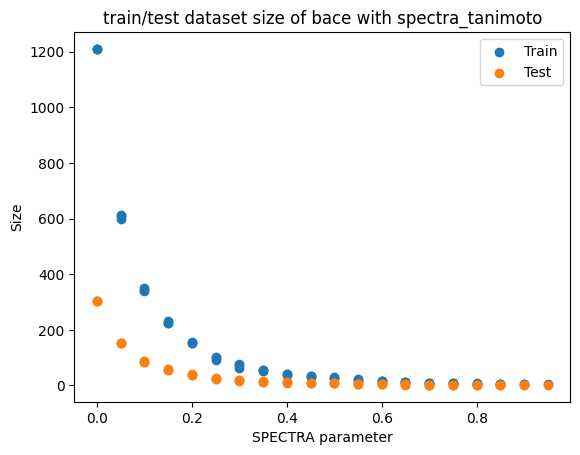

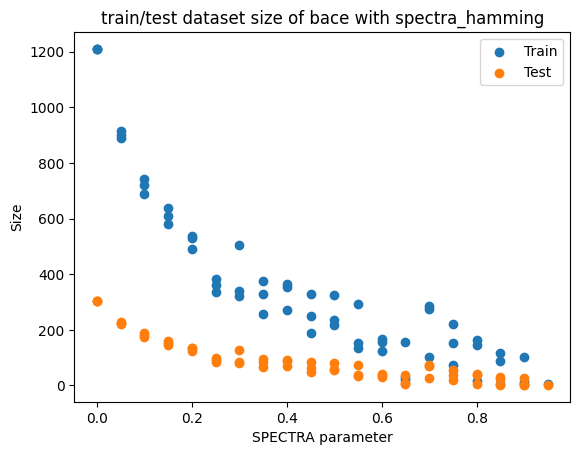

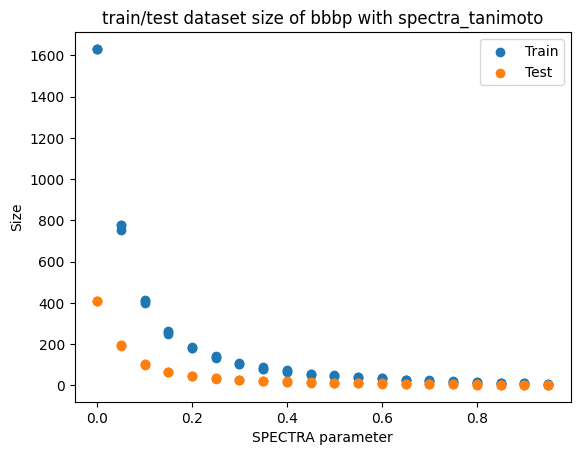

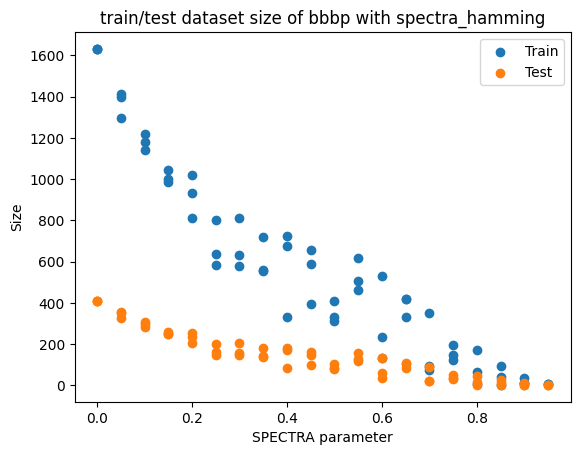

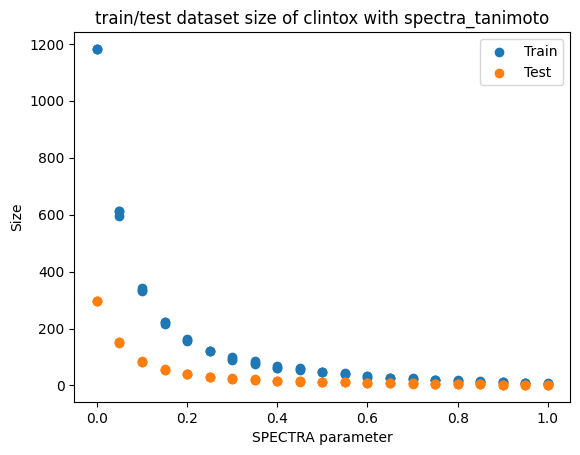

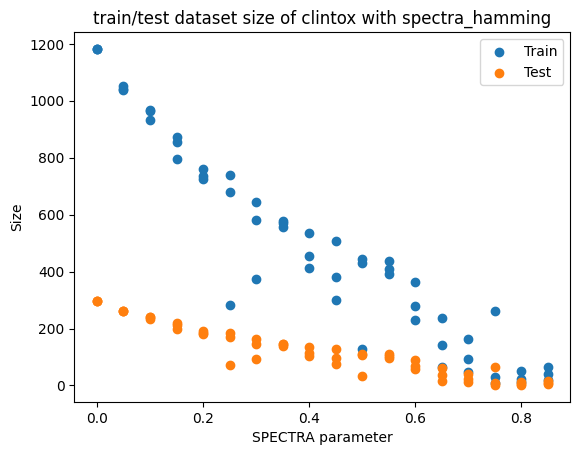

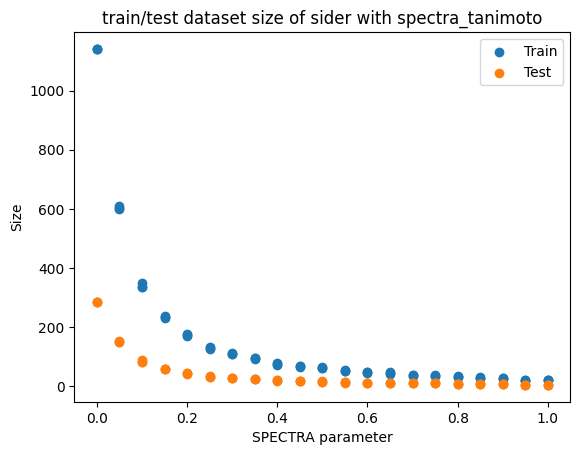

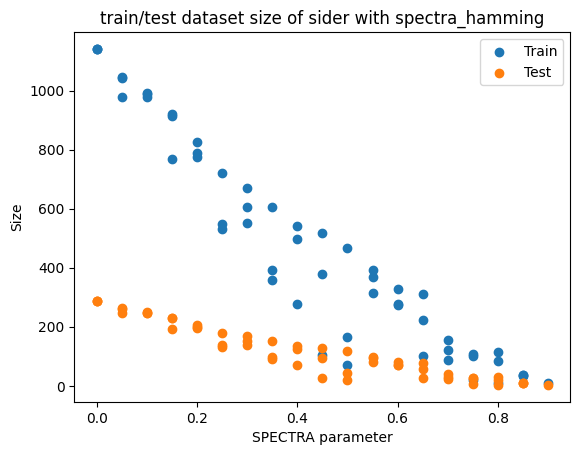

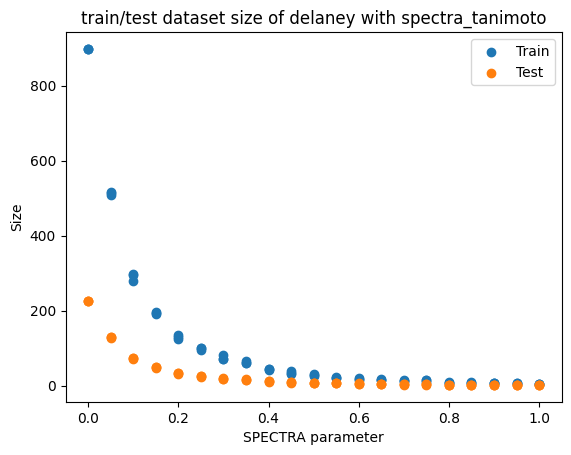

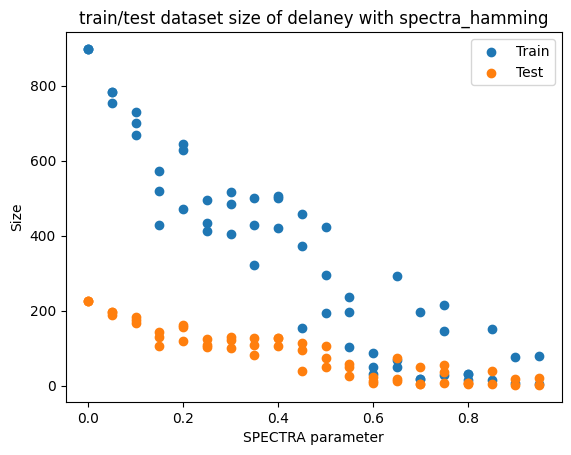

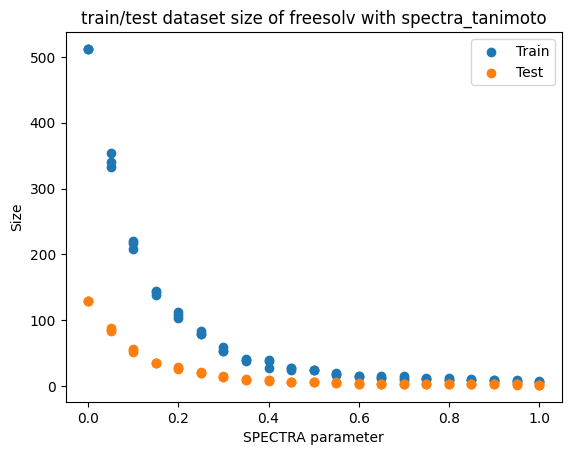

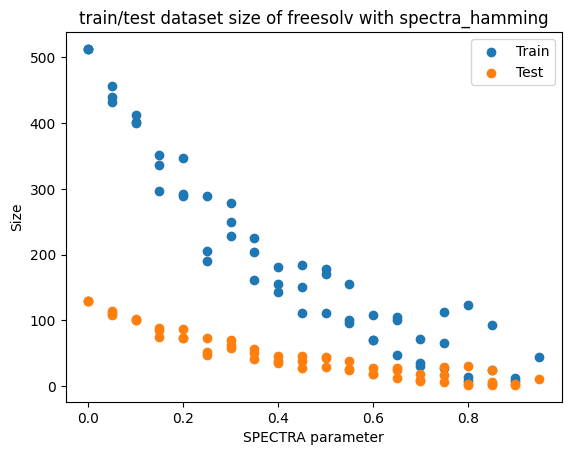

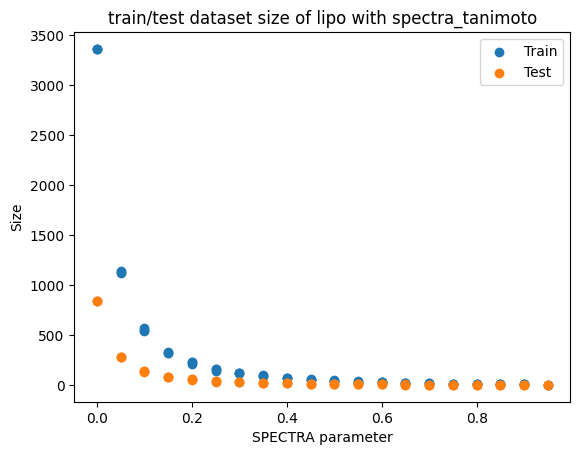

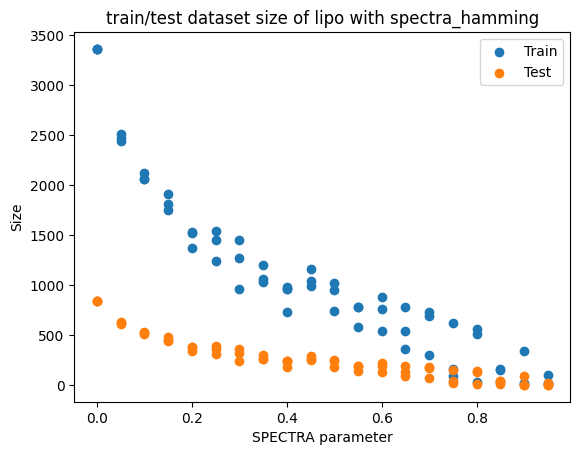

In [143]:
import matplotlib.pyplot as plt
import os

def plot_train_test_size(spectra_name, dataset_name):
    df = pd.read_csv(f'/Users/ivymac/Desktop/SAGE_Lab/metrics/chemprop/{spectra_name}/{dataset_name}_{spectra_name}_metrics.csv')
    os.makedirs(f'/Users/ivymac/Desktop/SAGE_Lab/metrics/chemprop/plots/train_test_size/{spectra_name}', exist_ok = True)
    file_path = os.path.join(f'/Users/ivymac/Desktop/SAGE_Lab/metrics/chemprop/plots/train_test_size', spectra_name, dataset_name)
    plt.scatter(df['SPECTRA_parameter'], df['train_size'])
    plt.scatter(df['SPECTRA_parameter'], df['test_size'])
    plt.xlabel('SPECTRA parameter')
    plt.ylabel('Size')
    plt.legend(['Train','Test'])
    plt.title(f'train/test dataset size of {dataset_name} with {spectra_name}')
    plt.savefig(file_path, dpi = 400)
    plt.show()
    plt.close()

dataset_names = ['bace','bbbp','clintox','sider','delaney','freesolv','lipo']
for dataset_name in dataset_names:
    for spectra_name in ['spectra_tanimoto','spectra_hamming']:
        plot_train_test_size(spectra_name, dataset_name)

In [152]:
csv_path = '/Users/ivymac/Desktop/SAGE_Lab/metrics/chemprop/classification_random_scaffold_umap_metrics.csv'
def classification_average(dataset_name,split_type):
    df = pd.read_csv(f'/Users/ivymac/Desktop/SAGE_Lab/metrics/chemprop/{split_type}/{dataset_name}_{split_type}_metrics.csv')
    mean = df['test/roc'].mean()
    std = df['test/roc'].std()
    row = pd.DataFrame({"mean":[mean],"std":[std]}, index= [f'{dataset_name}_{split_type}'])
    if Path(csv_path).exists():
        df = pd.read_csv(csv_path, index_col=0)
        col_order = df.columns.tolist()
        row = row[col_order]
        df = pd.concat([df, row], axis=0)
    else:
        df = row
    df.to_csv(csv_path)
    return df

dataset = ['tox21']
splits = ['random','scaffold','umap']
for dataset_name in dataset:
    for split_type in splits:
        df = classification_average(dataset_name,split_type)
df

,mean,std
bace_random,0.851392,6.975097e-03
bace_scaffold,0.697164,0.000000e+00
bace_umap,0.426611,4.201698e-02
bbbp_random,0.921503,8.646199e-03
bbbp_scaffold,0.817690,0.000000e+00
bbbp_umap,0.844881,5.901864e-02
clintox_random,0.979088,9.882315e-03
clintox_scaffold,0.983507,0.000000e+00
clintox_umap,0.980132,8.312513e-03
hiv_random,0.921960,4.459987e-02


In [153]:
csv_path = '/Users/ivymac/Desktop/SAGE_Lab/metrics/chemprop/regression_random_scaffold_umap_metrics.csv'
def regression_average(dataset_name,split_type):
    df = pd.read_csv(f'/Users/ivymac/Desktop/SAGE_Lab/metrics/chemprop/{split_type}/{dataset_name}_{split_type}_metrics.csv')
    mean = df['test/r2'].mean()
    std = df['test/r2'].std()
    row = pd.DataFrame({"mean":[mean],"std":[std]}, index= [f'{dataset_name}_{split_type}'])
    if Path(csv_path).exists():
        df = pd.read_csv(csv_path, index_col=0)
        col_order = df.columns.tolist()
        row = row[col_order]
        df = pd.concat([df, row], axis=0)
    else:
        df = row
    df.to_csv(csv_path)
    return df

dataset = ['delaney','freesolv','lipo']
splits = ['random','scaffold','umap']
for dataset_name in dataset:
    for split_type in splits:
        df = regression_average(dataset_name,split_type)
df

,mean,std
delaney_random,0.753416,1.620578e-02
delaney_scaffold,0.470040,4.214685e-08
delaney_umap,0.678443,1.043574e-01
freesolv_random,0.773451,6.645934e-02
freesolv_scaffold,0.646719,1.331132e-03
freesolv_umap,0.785349,8.023349e-02
lipo_random,0.664484,1.260574e-02
lipo_scaffold,0.550397,3.275545e-07
lipo_umap,0.692781,7.511033e-02
